In [984]:
import meep as mp
import meep.adjoint as mpa
import autograd.numpy as npa
from autograd import tensor_jacobian_product, grad
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Circle
import nlopt

seed = 240
np.random.seed(seed)
Si = mp.Medium(index=3.4)
SiO2 = mp.Medium(index=1.44)

In [985]:
Nx=57
Ny=57

In [986]:
n = Nx * Ny
x2 = np.random.uniform(0.5, 0.5, n)

In [987]:
print(x2)

[0.5 0.5 0.5 ... 0.5 0.5 0.5]


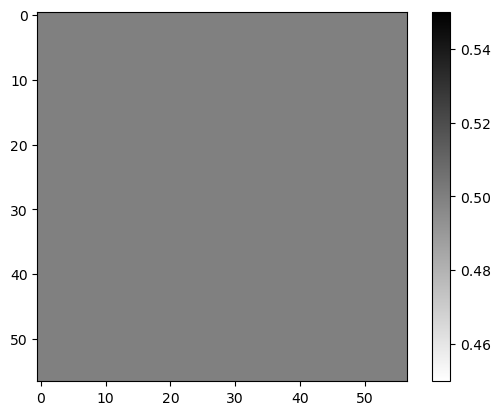

In [988]:
import matplotlib.pyplot as plt
plt.imshow(np.rot90(x2.reshape(Nx, Ny)), cmap='binary')
plt.colorbar()

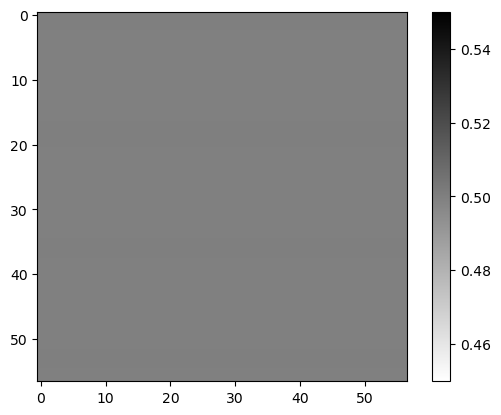

In [989]:
x3= mpa.conic_filter(
            x2,
            4,
            56,
            56,
            1,
        )

plt.imshow(np.rot90(x3.reshape(Nx, Ny)), cmap='binary')
plt.colorbar()

In [990]:
def left_right_symmetric(array):
    rows, cols = array.shape
    mid_col = cols // 2
    left_half = (array[:, :mid_col] + npa.fliplr(array[:, :mid_col])) / 2
    right_half = (array[:, mid_col:] + npa.fliplr(array[:, mid_col:])) / 2
    new_array = npa.hstack((left_half, right_half))
    return new_array

def up_down_symmetric(array):
    rows, cols = array.shape
    mid_row = rows // 2
    top_half = (array[:mid_row, :] + npa.flipud(array[:mid_row, :])) / 2
    bottom_half = (array[mid_row:, :] + npa.flipud(array[mid_row:, :])) / 2
    new_array = npa.vstack((top_half, bottom_half))
    return new_array

In [991]:
x2 = x2.reshape(Nx, Ny)

In [992]:
# Symmetry
lrfilp = left_right_symmetric(x2) # left-right symmetric
upfilp = up_down_symmetric(lrfilp) # up-down symmetric
diagonalfilp = (upfilp + upfilp.transpose()) / 2 # diagonal symmetric

In [993]:
padx = npa.pad(diagonalfilp, ((4,4),(4,4)), 'constant', constant_values=0) 

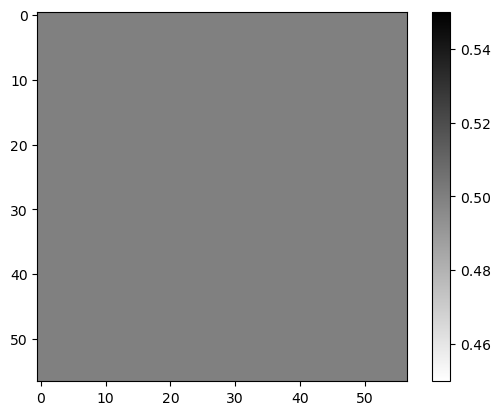

In [994]:
plt.imshow(np.rot90(diagonalfilp.reshape(Nx, Ny)), cmap='binary')
plt.colorbar()

In [995]:
filtered = mpa.conic_filter(
            diagonalfilp,
            4,
            56,
            56,
            1,
        )

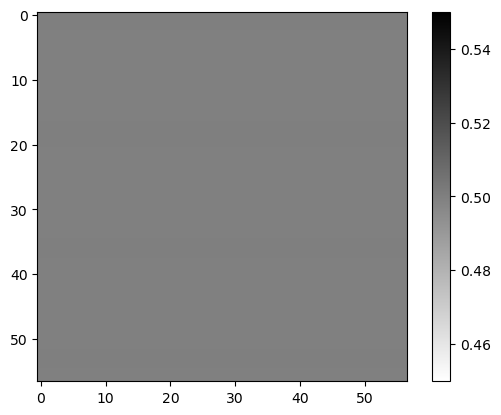

In [996]:
plt.imshow(np.rot90(filtered.reshape(Nx, Ny)), cmap='binary')
plt.colorbar()

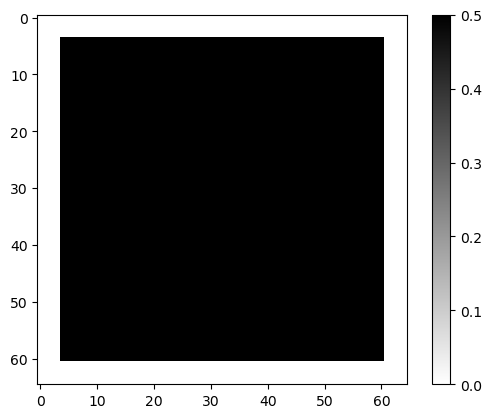

In [997]:
plt.imshow(np.rot90(padx.reshape(Nx+8, Ny+8)), cmap='binary')
plt.colorbar()

In [998]:
print(max(padx.flatten()))
print(np.mean(padx.flatten()))
print(min(padx.flatten()))

0.5
0.38449704142011837
0.0


In [999]:
from scipy.ndimage import gaussian_filter

filtered_x2 = mpa.conic_filter(
            padx,
            4,
            56 + 8,
            56 + 8,
            1,
        )

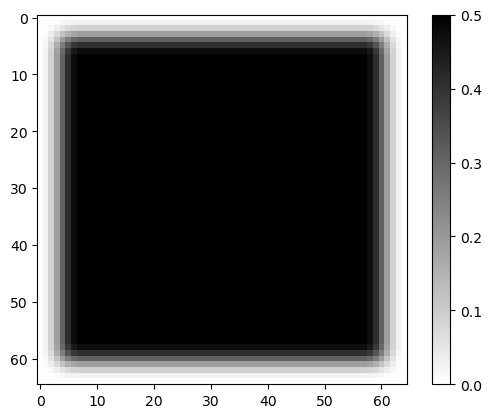

In [1000]:
plt.imshow(np.rot90(filtered_x2.reshape(Nx+8, Ny+8)), cmap='binary')
plt.colorbar()

In [1001]:
crop_field = filtered_x2[4:-4, 4:-4]

In [1002]:
print(padx)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


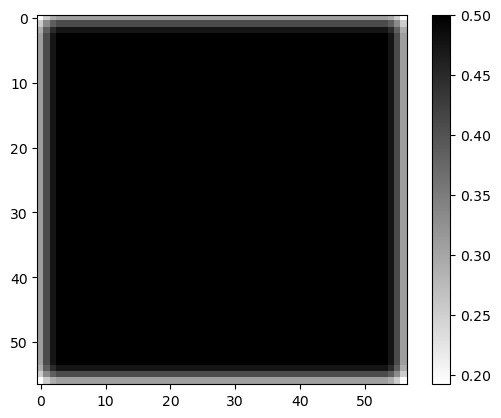

In [1003]:
import matplotlib.pyplot as plt
# padx = mpa.tanh_projection(padx, beta, 0.5)
plt.imshow(np.rot90(crop_field.reshape(Nx, Ny)), cmap='binary')
plt.colorbar()